In [9]:
#%% Libraries
# # Standard Libraries
from os import path
from pathlib import Path
from pprint import pprint
import asyncio as asyncio

# External Libraries
from IPython.display import display
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from sklearn.linear_model import BayesianRidge as BR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error as mse
import statistics as stats
import matplotlib.pylab as mlt

# Custom Libraries
from modules.shared.custom import split, getPI

In [10]:
# Just getting datasets
dataRoute = '../data/chembl/Additional_datasets/'
paths = ['data_CHEMBL313.csv', 'data_CHEMBL2637.csv', 'data_CHEMBL4124.csv']
dataSets = [pd.read_csv(dataRoute + path) for path in paths]
data = dataSets[0].sample(frac=1)
display(data)

,molecule_id,pXC50,b0001,b0002,b0003,b0004,b0005,b0006,b0007,b0008,...,b1015,b1016,b1017,b1018,b1019,b1020,b1021,b1022,b1023,b1024
1,CHEMBL100191,6.301,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3484,CHEMBL9329,7.237,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255,CHEMBL2204362,7.959,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3451,CHEMBL87739,7.013,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3178,CHEMBL569066,5.886,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,CHEMBL180182,7.500,1,1,1,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1010,CHEMBL195015,6.754,1,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2991,CHEMBL525712,6.300,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1771,CHEMBL293583,8.097,1,0,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
class Models:
    def __init__(self, m):
        self.models = m
    def fit(self, *args):
        self.trainedModels = [m.fit(*args) for m in self.models]
    def predict(self, *args):
        return np.mean([m.predict(*args) for m in self.trainedModels], axis=0)

def validate(y_true, y_false):
    return mse(y_true, y_false, sample_weight=y_true)

In [12]:
# Splitting up the data
X_known, Y_known, X_unknown, Y_unknown, X_test, Y_test = split(data, 160)

# Each testing stage can test 160 cases and up to 2000 samples will be tested
testSize = 160
maxSamples = len(Y_unknown)

# models to be used and pre-defining variables
models = Models([BR(), KNN(), RFR()])
predicitions: list
scores: list
smartScores: list
tree: KDTree

In [13]:
runningScore = []

for i in range(0, maxSamples, testSize):
    print(f'\r{i}.0 out of {maxSamples}', end="")
    models.fit(X_known, Y_known)
    Y_predict = models.predict(X_test)
    score = validate(Y_test, Y_predict)
    runningScore.append(score)
    X_known, Y_known, X_unknown, Y_unknown = getPI((X_known, Y_known), (X_unknown, Y_unknown), X_unknown.index[:min(testSize, len(X_unknown))])   



2880.0 out of 3014

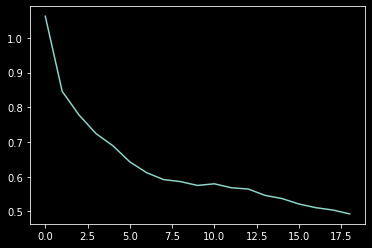

In [14]:
mlt.plot(runningScore)
